In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


In [223]:
housing_df = pd.read_csv('kc_house_data.csv')

In [224]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [225]:
housing_df.info()

# date is an object data type
# id can be ignored
# isna() didnt return any null count
# there are 21613 observations with 21 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [226]:
housing_df.shape

(21613, 21)

In [227]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [228]:
housing_df['original_age'] = pd.DatetimeIndex(housing_df['date']).year - housing_df['yr_built']
housing_df.loc[housing_df['yr_renovated'] == 0, 'yr_renovated'] = housing_df['yr_built']
housing_df['refurbished_age'] = pd.DatetimeIndex(housing_df['date']).year - housing_df['yr_renovated']

In [229]:
housing_df.drop(['id','date','yr_built', 'yr_renovated'], axis = 1, inplace=True)

In [230]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price              21613 non-null float64
bedrooms           21613 non-null int64
bathrooms          21613 non-null float64
sqft_living        21613 non-null int64
sqft_lot           21613 non-null int64
floors             21613 non-null float64
waterfront         21613 non-null int64
view               21613 non-null int64
condition          21613 non-null int64
grade              21613 non-null int64
sqft_above         21613 non-null int64
sqft_basement      21613 non-null int64
zipcode            21613 non-null int64
lat                21613 non-null float64
long               21613 non-null float64
sqft_living15      21613 non-null int64
sqft_lot15         21613 non-null int64
original_age       21613 non-null int64
refurbished_age    21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [234]:
housing_df['zipcode'] = housing_df['zipcode'].astype('category')

housing_df.join(pd.get_dummies(housing_df['zipcode'], drop_first=True))
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price              21613 non-null float64
bedrooms           21613 non-null int64
bathrooms          21613 non-null float64
sqft_living        21613 non-null int64
sqft_lot           21613 non-null int64
floors             21613 non-null float64
waterfront         21613 non-null int64
view               21613 non-null int64
condition          21613 non-null int64
grade              21613 non-null int64
sqft_above         21613 non-null int64
sqft_basement      21613 non-null int64
zipcode            21613 non-null category
lat                21613 non-null float64
long               21613 non-null float64
sqft_living15      21613 non-null int64
sqft_lot15         21613 non-null int64
original_age       21613 non-null int64
refurbished_age    21613 non-null int64
dtypes: category(1), float64(5), int64(13)
memory usage: 3.0 MB


In [232]:

housing_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,original_age,refurbished_age
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.307003,0.021626,0.585379,0.082447,-0.053951,-0.105672
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.008931,0.129473,0.391638,0.029244,-0.154324,-0.165626
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.024573,0.223042,0.568634,0.087175,-0.506407,-0.537469
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.052529,0.240223,0.756420,0.183286,-0.318488,-0.344135
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.085683,0.229521,0.144608,0.718557,-0.052990,-0.052809
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.049614,0.125419,0.279885,-0.011269,-0.489640,-0.505651
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.014274,-0.041910,0.086463,0.030703,0.026093,0.000469
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.006157,-0.078400,0.280439,0.072575,0.053458,0.018282
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.014941,-0.106500,-0.092824,-0.003406,0.360665,0.395525
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.114084,0.198372,0.713202,0.119248,-0.447415,-0.461180


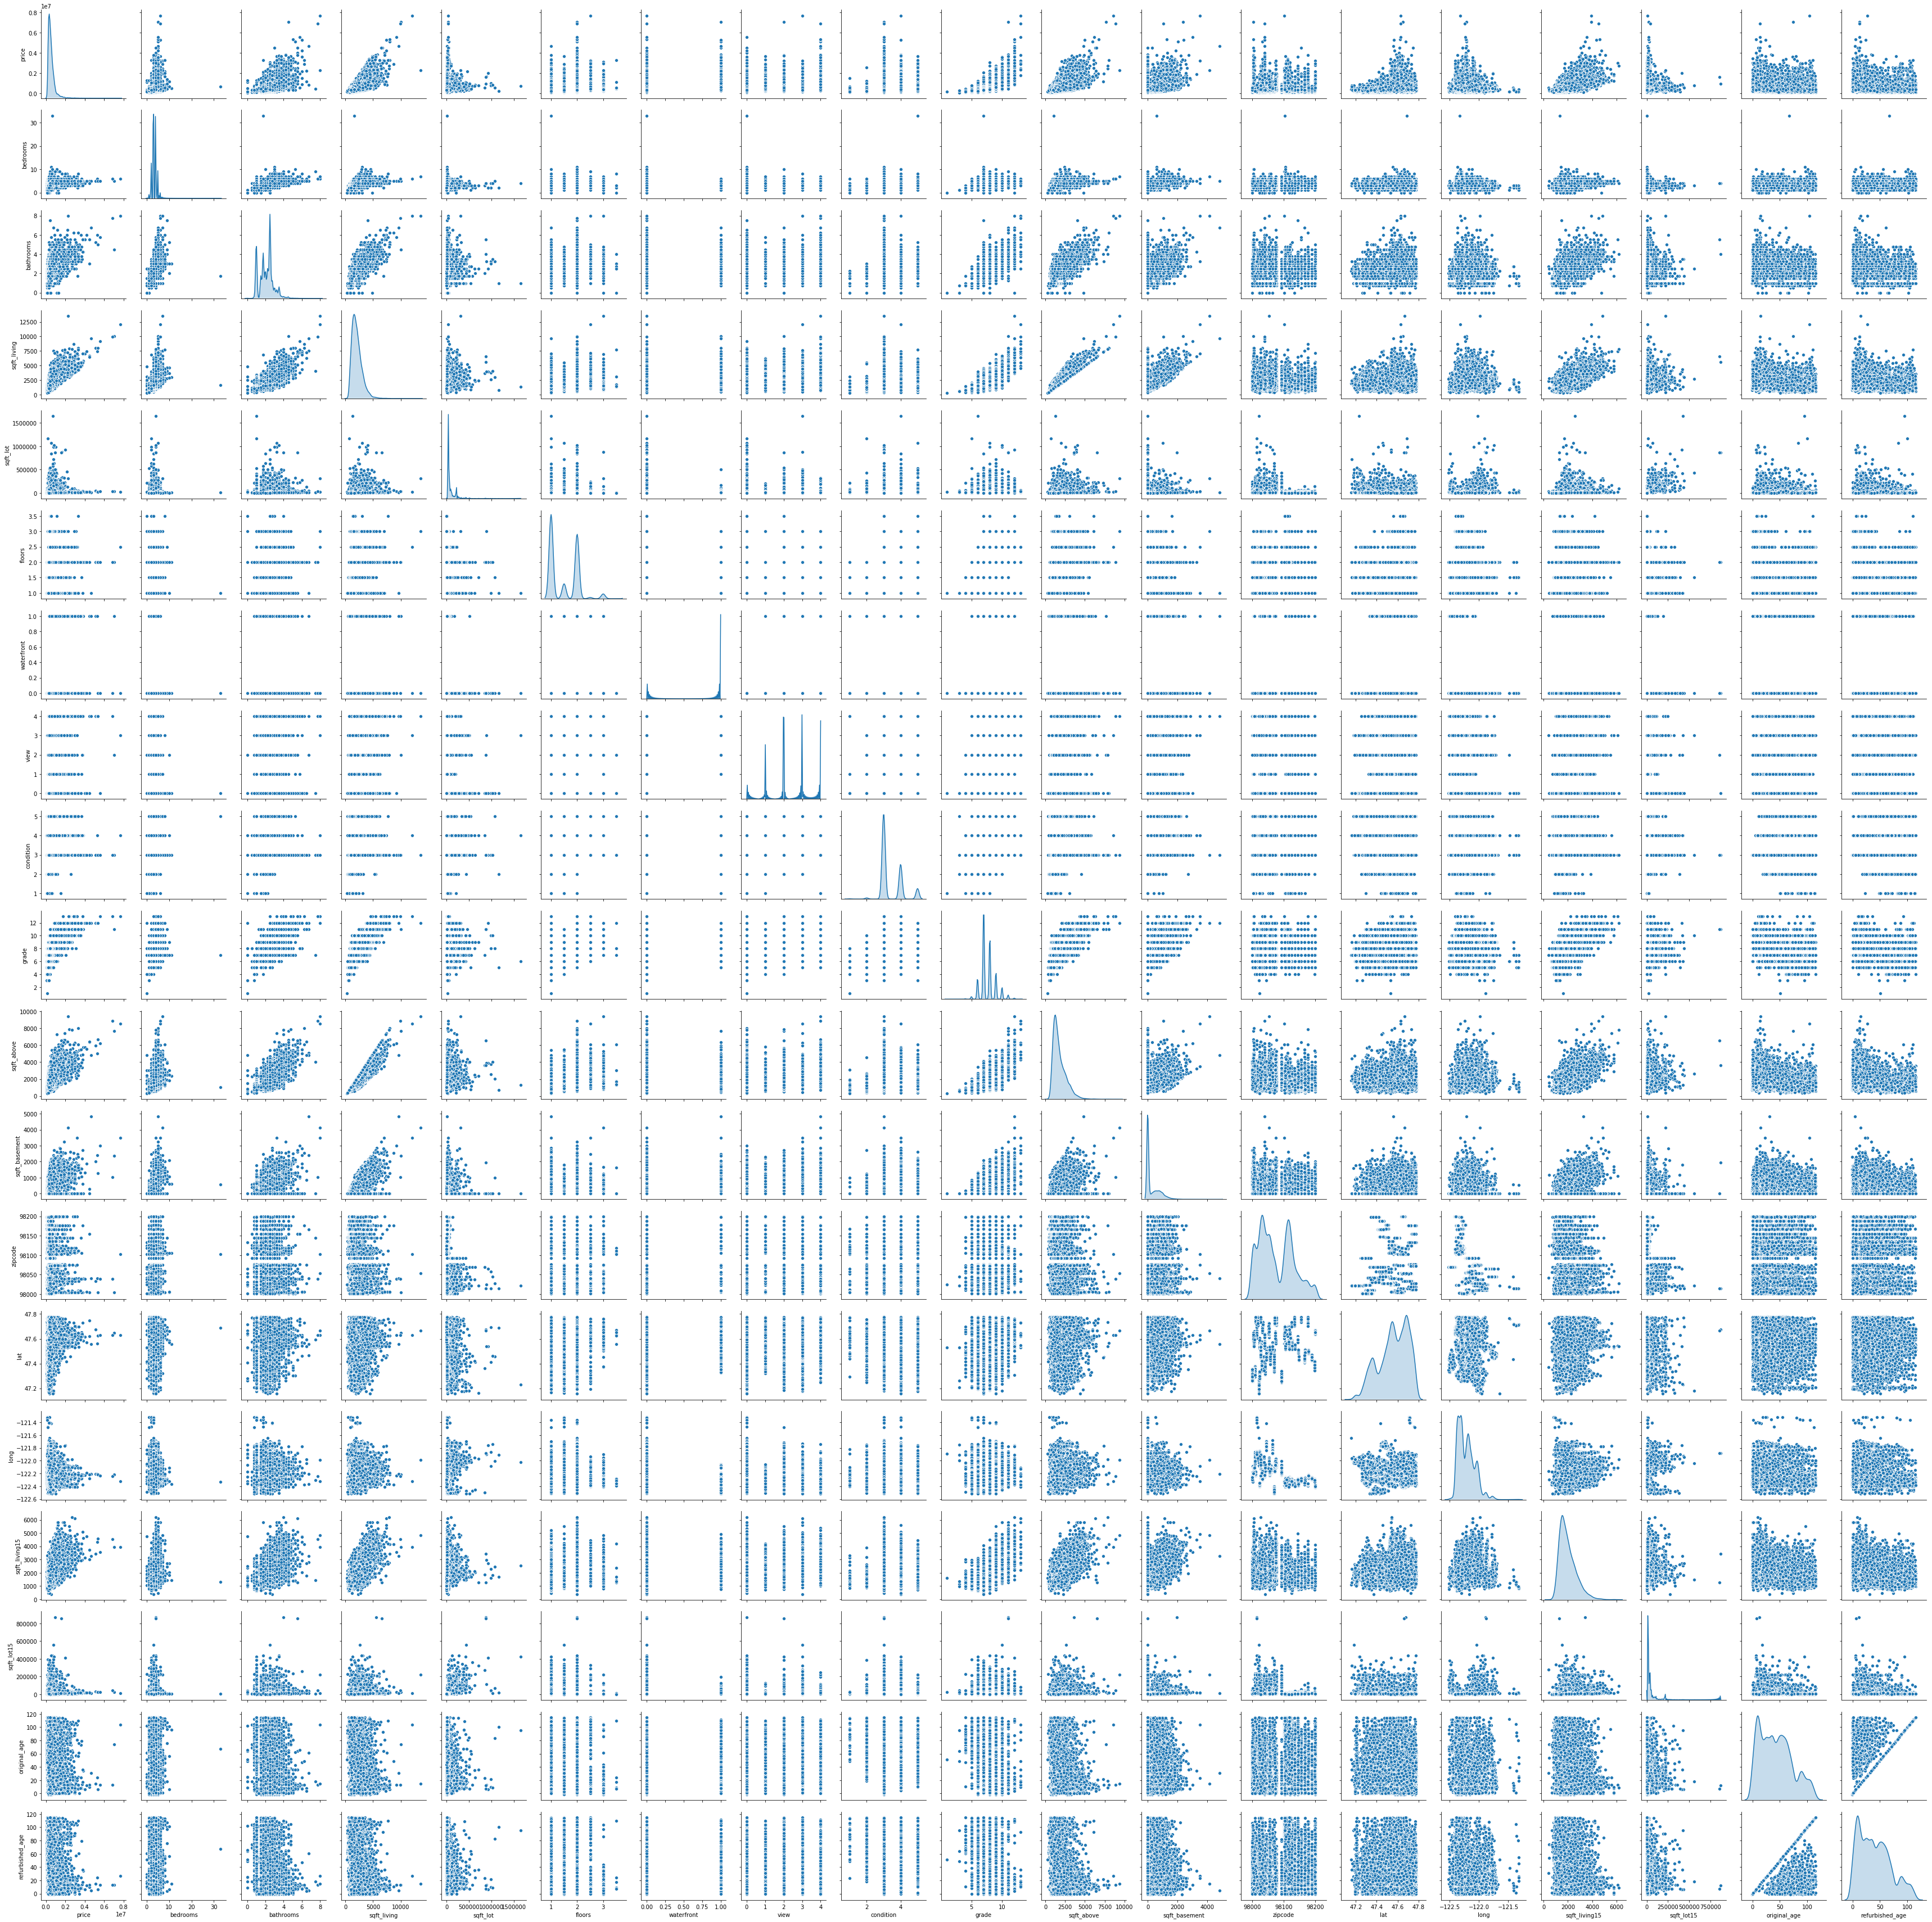

In [233]:
sns.pairplot(housing_df, diag_kind="kde")

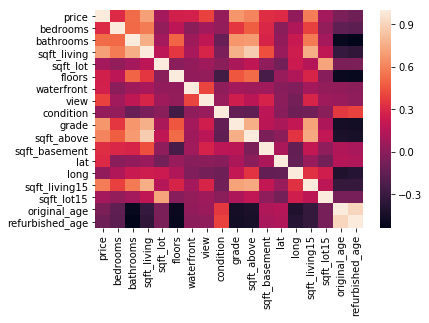

In [235]:
sns.heatmap(housing_df.corr())

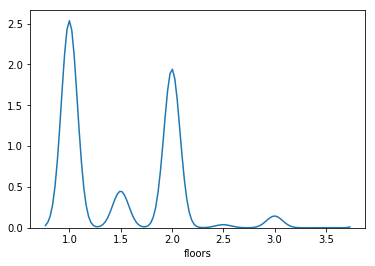

In [236]:
attributes = ["price", "bedrooms", "bathrooms", "sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]
sns.distplot(housing_df["floors"], hist=False)

In [237]:
(housing_df.loc[housing_df['sqft_living'] == 1620]).groupby('bedrooms').count()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,original_age,refurbished_age
bedrooms,,,,,,,,,,,,,,,,,,
2,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
3,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
33,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


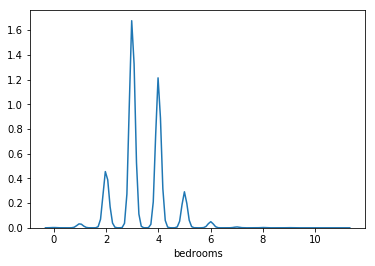

In [238]:
# Replacing 33 with 3 . Most probably a typo error. Can be replaced with 3 as it occurs majorly for house of same sqft
housing_df.loc[housing_df['bedrooms'] == 33, 'bedrooms'] = 3
sns.distplot(housing_df["bedrooms"], hist=False)

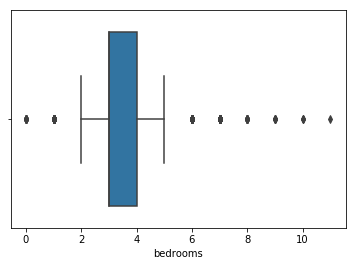

In [282]:
sns.boxplot(x=housing_df['bedrooms'])

In [239]:
import statsmodels.formula.api as smf

In [240]:
m1=smf.ols('price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+original_age+refurbished_age+zipcode+lat+long+sqft_living15+sqft_lot15' ,housing_df).fit()

In [241]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:54:22   Log-Likelihood:            -2.8973e+05
No. Observations:               21613   AIC:                         5.796e+05
Df Residuals:                   21527   BIC:                         5.803e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.678e+07   6.14e+06     -4.359      0.000   -3.88e+07   -1.47e+07
zipcode[T.98002]  3.487e+04   1.45e+04      2.408      0.016    6486.196    6.33e+04
zipcode[T.98003] -2.277e+04   1.29e+04     -1.758      0.079   -4.81e+04    2612.646
zipcode[T.98004]  7.167e+05   2.35e+04     30.460      0.000    6.71e+05    7.63e+05
zipcode[T.98005]  2.471e+05   2.52e+04      9.825      0.000    1.98e+05    2.96e+05
zipcode[T.98006]  2.273e+05   2.06e+04     11.054      0.000    1.87e+05    2.68e+05
zipcode[T.98007]  1.943e+05    2.6e+04      7.488      0.000    1.43e+05    2.45e+05
zipcode[T.98008]  2.035e+05   2.47e+04      8.255      0.000    1.55e+05    2.52e+05
zipcode[T.98010]   9.73e+04   2.21e+04      4.407      0.000     5.4e+04    1.41e+05
zipcode[T.98011]    3.3e+04   3.21e+04      1.029      0.303   -2.99e+04    9.59e+04
zipcode[T.98014]  7.414e+04   3.52e+04      2.105      0.035    5102.546    1.43e+05
zipcode[T.98019]  3.684e+04   3.47e+04      1.060      0.289   -3.12e+04    1.05e+05
zipcode[T.98022]  4.261e+04   1.92e+04      2.222      0.026    5029.101    8.02e+04
zipcode[T.98023] -4.664e+04   1.19e+04     -3.916      0.000      -7e+04   -2.33e+04
zipcode[T.98024]  1.487e+05   3.09e+04      4.809      0.000    8.81e+04    2.09e+05
zipcode[T.98027]  1.502e+05   2.11e+04      7.118      0.000    1.09e+05    1.92e+05
zipcode[T.98028]  2.557e+04   3.11e+04      0.821      0.412   -3.55e+04    8.66e+04
zipcode[T.98029]  1.897e+05   2.41e+04      7.870      0.000    1.42e+05    2.37e+05
zipcode[T.98030]  2810.8515   1.42e+04      0.197      0.844   -2.51e+04    3.07e+04
zipcode[T.98031]  3932.5684   1.48e+04      0.265      0.791   -2.51e+04     3.3e+04
zipcode[T.98032] -8566.9081   1.72e+04     -0.498      0.619   -4.23e+04    2.52e+04
zipcode[T.98033]  2.922e+05   2.67e+04     10.936      0.000     2.4e+05    3.45e+05
zipcode[T.98034]  1.193e+05   2.86e+04      4.164      0.000    6.31e+04    1.75e+05
zipcode[T.98038]  4.862e+04    1.6e+04      3.043      0.002    1.73e+04    7.99e+04
zipcode[T.98039]  1.251e+06   3.18e+04     39.349      0.000    1.19e+06    1.31e+06
zipcode[T.98040]  4.609e+05   2.08e+04     22.146      0.000     4.2e+05    5.02e+05
zipcode[T.98042]  1.242e+04   1.36e+04      0.912      0.362   -1.43e+04    3.91e+04
zipcode[T.98045]  1.211e+05   2.95e+04      4.103      0.000    6.33e+04    1.79e+05
zipcode[T.98052]  1.642e+05   2.73e+04      6.020      0.000    1.11e+05    2.18e+05
zipcode[T.98053]  1.393e+05   2.92e+04      4.767      0.000     8.2e+04    1.97e+05
zipcode[T.98055]  2.253e+04   1.65e+04      1.364      0.172   -9836.783    5.49e+04
zipcode[T.98056]  6.359e+04   1.79e+04      3.545      0.000    2.84e+04    9.88e+04
zipcode[T.98058]  1.438e+04   1.56e+04      0.922      0.357   -1.62e+04     4.5e+04
zipcode[T.98059]  5.969

In [ ]:
#floors has a p value greater than 0.05, we can ignore it. 

In [349]:
X_init=housing_df.drop(['price','zipcode'],axis=1)
Y_init=housing_df[['price']]

Xtrain,Xtest,ytrain,ytest=train_test_split(X_init,Y_init,test_size=0.3,random_state=1)
sc = StandardScaler().fit(Xtrain)
Xtrain = StandardScaler().fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [350]:
from sklearn.linear_model import LinearRegression

In [351]:
model=LinearRegression()
model.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

price    221215.530931
dtype: float64

In [352]:
model.score(Xtest, ytest)

0.6864470386183981

In [353]:
model.coef_

array([[-31820.53140301,  31182.48258853,  78831.87956621,
          3925.40410131,   1951.19674454,  49804.05495682,
         36725.9710212 ,  19973.68748106, 111597.67324989,
         73968.34419346,  24407.03851937,  79478.02657026,
        -15647.75699826,  16717.74437056,  -9234.22778138,
         88893.27566883, -17120.59893018]])

In [354]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [377]:
rd=Ridge(alpha=0.01,normalize=True)
Ls=Lasso(alpha=0.05,normalize=True)

In [378]:
rd.fit(Xtrain,ytrain)
rd_pred=rd.predict(Xtest)
Ls.fit(Xtrain,ytrain)
Ls_pred=Ls.predict(Xtest)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [379]:
rd.score(Xtest, ytest)

0.6860746576974919

In [358]:
Ls.score(Xtest, ytest)

0.6864461018200435

In [177]:
# 0.65 - Ridge alpha = 0.5
# 0.672 - Ridge alpha 0.25
# 0.68 - Ridge alpha 0.05
# 0.69 - Lasso alpha = 0.05, 0.25, 0.5


In [359]:
variables=X_init.columns
Ls.coef_

array([-31814.96658784,  31149.50176312, 236234.67710279,   3905.49954045,
         1953.97499714,  49800.15464486,  36727.33848215,  19959.85946639,
       111615.65323996, -68423.82782136, -52303.99955764,  79471.2689776 ,
       -15636.97879312,  16676.75145103,  -9217.18577631,  88824.13647381,
       -17047.35866126])

In [360]:
rd.coef_

array([[-27045.81099368,  31900.76623033,  75200.39213869,
          3684.8777187 ,   4652.66235427,  48247.96982058,
         37415.45428295,  18714.85893447, 102896.8103052 ,
         69698.21555263,  24883.87885315,  76993.27867896,
        -16842.69502768,  23306.05660045,  -7774.47043791,
         68500.90562002,   -578.5337187 ]])

In [361]:
from sklearn.metrics import mean_squared_error
rd_rmse=np.sqrt(mean_squared_error(ytest,rd_pred))
rd_rmse



222091.70486507396

In [362]:
Ls_rmse=np.sqrt(mean_squared_error(ytest,Ls_pred))
Ls_rmse


221215.86139245474

In [363]:
Ls.coef_

array([-31814.96658784,  31149.50176312, 236234.67710279,   3905.49954045,
         1953.97499714,  49800.15464486,  36727.33848215,  19959.85946639,
       111615.65323996, -68423.82782136, -52303.99955764,  79471.2689776 ,
       -15636.97879312,  16676.75145103,  -9217.18577631,  88824.13647381,
       -17047.35866126])

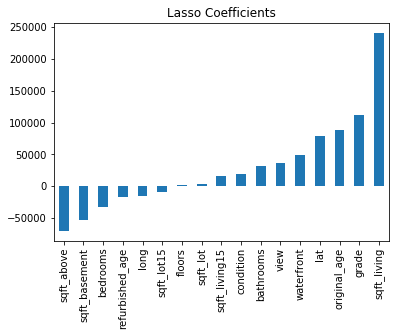

In [259]:
lasso_beta=pd.Series(Ls.coef_,variables).sort_values()
lasso_beta.plot(kind='bar',title='Lasso Coefficients')

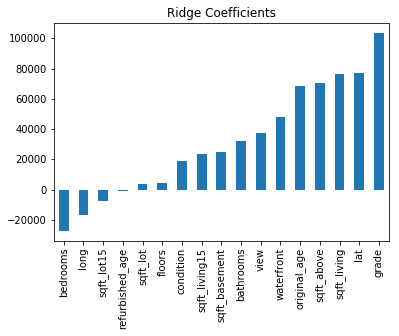

In [260]:
ridge_beta=pd.Series(rd.coef_[0],variables).sort_values()
ridge_beta.plot(kind='bar',title='Ridge Coefficients')

In [276]:
# pd.DataFrame(X_init_std)
# X_init
from sklearn import metrics

In [444]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([model,rd,Ls],['MVLR','Ridge','Lasso']):
    rmse=[]
    for train,test in kf.split(X_init_std,Y_init):
        Ytrain_kf,Ytest_kf=Y_init.iloc[train],Y_init.iloc[test]
        Xtrain_kf, Xtest_kf = X_init_std[train], X_init_std[test]

        model.fit(Xtrain_kf,Ytrain_kf)
        Y_predict=model.predict(Xtest_kf)
        rmse.append(np.sqrt(metrics.mean_squared_error(Ytest_kf,Y_predict)))
#         print(model.score(Xtest_kf, Ytest_kf))
    print(rmse)
    print("Cross_Validated_rmse_score: %0.03f (+/- %0.5f) [%s]" % (np.mean(rmse),np.var(rmse,ddof=1),name))   

0.701955496695964
0.6896366850943395
0.6918081091604077
[202426.05278898898, 201243.1167745081, 204987.01802354283]
Cross_Validated_rmse_score: 202885.396 (+/- 3662446.18491) [MVLR]
0.7018148583787911
0.6897653612943583
0.6918561958230194
[202473.8065665142, 201201.39489101272, 204971.0255097929]
Cross_Validated_rmse_score: 202882.076 (+/- 3677541.48744) [Ridge]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7019510579335727
0.6896460391740963
0.6919631082175604
[202427.56014409004, 201240.08410560293, 204935.46444386203]
Cross_Validated_rmse_score: 202867.703 (+/- 3559253.19386) [Lasso]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [288]:
from scipy import stats
X_init_z = stats.zscore(X_init)
print(np.where(np.abs(X_init_z)>3))

(array([    5,     5,     5, ..., 21590, 21590, 21600]), array([ 1,  2, 13, ..., 10, 13,  9]))


In [407]:
X_init_pca=housing_df.drop(['price'],axis=1)
Y_init_pca=housing_df[['price']]


# scpca = StandardScaler().fit_transform(X_init_pca)


Xtrain_pca,Xtest_pca,ytrain_pca,ytest_pca=train_test_split(X_init_pca,Y_init_pca,test_size=0.3,random_state=1)
zipCodeTrain = Xtrain_pca[['zipcode']]
zipCodeTrain.reset_index(drop=True, inplace=True)
Xtrain_pca.drop(['zipcode'], axis=1, inplace=True)
zipCodeTest = Xtest_pca[['zipcode']]
Xtest_pca.drop(['zipcode'], axis=1, inplace=True)
zipCodeTest.reset_index(drop=True, inplace=True)

scpca = StandardScaler().fit(Xtrain_pca)
Xtrain_pca = pd.concat([pd.DataFrame(StandardScaler().fit_transform(Xtrain_pca)), zipCodeTrain],axis=1, ignore_index=True)
Xtest_pca = pd.concat([pd.DataFrame(scpca.transform(Xtest_pca)), zipCodeTest], axis=1, ignore_index=True)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [433]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca = pca.fit(Xtrain_pca)
# pca.components_


In [434]:
pca.explained_variance_ratio_

array([9.94434861e-01, 1.72495328e-03, 7.72345154e-04, 5.93857310e-04,
       4.47599337e-04, 3.43393778e-04, 3.10987908e-04, 2.45919752e-04,
       2.29569398e-04, 2.21017042e-04])

In [435]:
X_reduced = pca.fit_transform(Xtrain)
X_test_reduced = pca.transform(Xtest)


In [436]:
# X_reduced.shape
Xtrain.shape

(15129, 17)

In [437]:
ytrain.shape

(15129, 1)

In [438]:
model=LinearRegression()
model.fit(X_reduced,ytrain)
y_pred=model.predict(X_test_reduced)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

price    226296.132822
dtype: float64

In [439]:
model.score(X_test_reduced, ytest)

0.6718790631059226

In [440]:
# Lasso regression has a better r2 score and minimal variance.